In [14]:
from itertools import combinations
from collections import Counter

import numpy as np
import pandas as pd
import networkx as nx
from node2vec import Node2Vec

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
classes = ['cat', 'dog', 'black', 'grey', 'brown', 'white', 'yellow']

[('cat', 'black', {'weight': 0.35}), ('cat', 'grey', {'weight': 0.05}), ('cat', 'brown', {'weight': 0.125}), ('cat', 'white', {'weight': 0.025}), ('black', 'dog', {'weight': 0.025}), ('grey', 'dog', {'weight': 0.025}), ('brown', 'dog', {'weight': 0.4}), ('dog', 'yellow', {'weight': 0.05})]


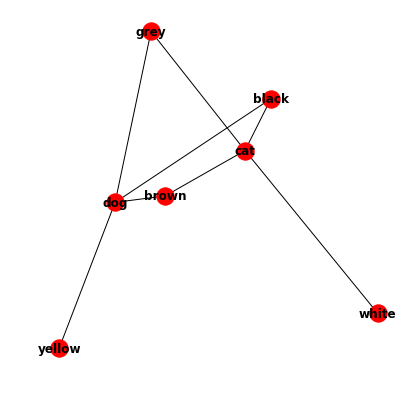

In [116]:
net = nx.Graph()
net.add_weighted_edges_from([('cat', 'black', 70 / 200), ('cat', 'grey', 10/200), ('cat', 'brown', 25/200), ('cat', 'white', 5/200)])
net.add_weighted_edges_from([('dog', 'black', 5/200), ('dog', 'grey', 5/200), ('dog', 'brown', 80/200), ('dog', 'yellow', 10/200) ])

print(net.edges(data=True))

plt.figure(figsize=(5, 5))
nx.draw_spring(net, with_labels=True, font_weight='bold')

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:01<00:00, 163.53it/s]


['cat', 'black', 'brown', 'dog', 'yellow', 'grey', 'white']
0


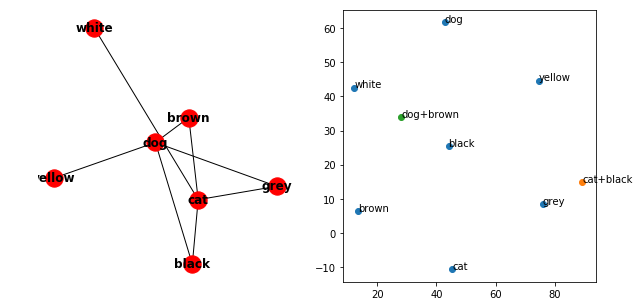

In [124]:
import random

# np.random.seed(13)
# random.seed(13)

node2vec = Node2Vec(net,
                    dimensions=4,
                    walk_length=30,
                    num_walks=200,
                    workers=1,
                    weight_key='weight')

model = node2vec.fit(window=3,
                     min_count=1,
#                      batch_words=4,
                    )

nodes = [x for x in model.wv.vocab]
print(nodes)
embeddings = np.array([model.wv[x] for x in nodes])

tsne = TSNE(n_components=2, random_state=13, perplexity=7)
embeddings_2d = tsne.fit_transform(embeddings)

# embeddings_2d = embeddings

plt.figure(figsize=(10, 5))

plt.subplot(121)
nx.draw_spring(net, with_labels=True, font_weight='bold')

plt.subplot(122)
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for node, emb in zip(nodes, embeddings_2d):
    plt.text(emb[0], emb[1], node)


plt.scatter(embeddings_2d[nodes.index('cat'), 0] + embeddings_2d[nodes.index('black'), 0],
            embeddings_2d[nodes.index('cat'), 1] + embeddings_2d[nodes.index('black'), 1])
plt.text(embeddings_2d[nodes.index('cat'), 0] + embeddings_2d[nodes.index('black'), 0],
         embeddings_2d[nodes.index('cat'), 1] + embeddings_2d[nodes.index('black'), 1], 'cat+black')

plt.scatter((embeddings_2d[nodes.index('dog'), 0] + embeddings_2d[nodes.index('brown'), 0]) / 2,
            (embeddings_2d[nodes.index('dog'), 1] + embeddings_2d[nodes.index('brown'), 1]) / 2)
plt.text((embeddings_2d[nodes.index('dog'), 0] + embeddings_2d[nodes.index('brown'), 0]) / 2,
         (embeddings_2d[nodes.index('dog'), 1] + embeddings_2d[nodes.index('brown'), 1]) / 2, 'dog+brown')

print(nodes.index('cat'))